# EX 5: Medical Insurance Prediction

**Objective**: Learn more about Linear Regression and its different training techniques.
    
You will be using a medical insurance dataset.
Below are some informations to help **frame the problem**:

For a health insurance company to make money, it needs to collect more in yearly premiums than it spends on medical care to its beneﬁciaries.

As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.

Medical expenses are diﬃcult to estimate because the costliest conditions are rare and seemingly random.

Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.

The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments.

These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower, depending on the expected treatment costs.


## Collecting data

For this analysis, we will use a simulated dataset containing hypothetical medical expenses for patients in the United States.

This data was created using demographic statistics from the US Census Bureau, and approximately reﬂect real-world conditions.

The data includes **1,338 examples** of beneﬁciaries currently enrolled in the insurance plan, with features indicating characteristics of the patient as well as the total medical expenses charged to the plan for the calendar year. There are 6 features:

    • age: An integer indicating the age of the primary beneﬁciary (excluding those above 64 years, since they are generally covered by the government).

    • sex: The policy holder’s gender, either male or female.

    • bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

    • children: An integer indicating the number of children/dependents covered by the insurance plan.

    • smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.

    • region: The beneﬁciary’s place of residence in the US,divided into four geographic regions: northeast, southeast, southwest, or northwest.

It is important to give some thought to how these variables may be related to billed medical expenses.

For instance, we might expect that older people and smokers are at higher risk of large medical expenses. Unlike many other machine learning methods, in regression analysis, the relationships among the features are typically speciﬁed by the user rather than being detected automatically.

Let’s explore some of these potential relationships.


## Exploring and preparing the data

1. Load the data for analysis.
2. Show the structure of the data.
3. What feature is the dependent feature and which ones are the independent features? What is the type of each feature in the data?
4. How to analysis the dependent feature and why using this method?
5. Give two methods that describe if the dependent variable is normally distributed? Explain the distribution of the dependent feature.
6. Which of the independent features are categoricals in the data? Look into the distribution of each one. Explain the results.


#### `Author:   Hongru He`
#### `Date:     01/28/2026`

### 1. Load the data for analysis

In [2]:
# Environment Setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Show the structure of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3. Dependent vs. independent features & data types
#### Dependent feature (target variable)
- `charges`
    - Type: numerical (float)
    - Meaning: medical insurance cost billed to the individual

#### Independent features (predictors)
| Feature | Type | Description |
| ---- | ---- | ---- |
| `age` | Numerical (int) | Age of primary beneficiary |
| `sex` | Categorical (object) | Male / Female |
| `bmi` | Numerical (float) | Body Mass Index |
| `children` | Numerical (int) | Number of dependents |
| `smoker` | Categorical (object) | Yes / No |
| `region` | Categorical (object) | Residential area in the US |

### 4. How to analyze the dependent feature and why
The dependent feature charges is a continuous numerical variable, so appropriate analysis methods include:
- Descriptive statistics (mean, median, std)
- Distribution visualization (histogram, KDE)
- Skewness analysis

In [5]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

**Why this method?**
- Descriptive statistics summarize central tendency and variability
- Distribution analysis helps determine whether assumptions (e.g., normality) hold, which is critical for many ML and statistical models

### 5. Methods to check whether the dependent variable is normally distributed
#### Method 1: Histogram / Density Plot (visual method)

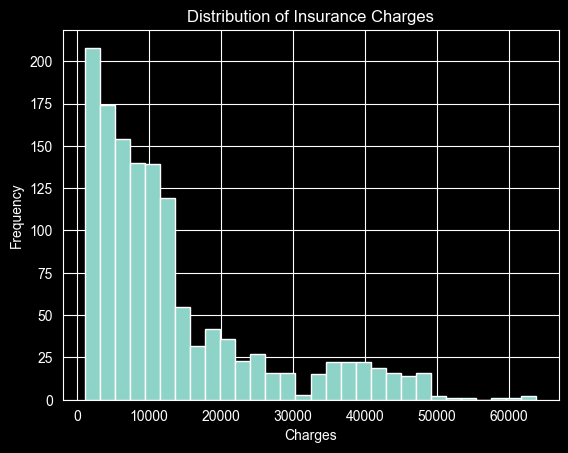

In [6]:
plt.hist(df['charges'], bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Charges')
plt.show()

**Interpretation**:
- The distribution is **right-skewed**
- Most values are concentrated at lower charges with a long tail of high-cost cases

#### Method 2: Statistical test or skewness metric

In [7]:
df['charges'].skew()

np.float64(1.5158796580240388)

- A positive skewness value confirms right-skewness

#### Conclusion on distribution
- The dependent variable is not normally distributed
- It shows strong right skew
- This suggests transformations (e.g., log transformation) may be useful in modeling

### 6. Categorical independent features & their distributions
#### Categorical features
- `sex`
- `smoker`
- `region`

#### Distribution analysis

In [14]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

- Roughly balanced between male and female
- No strong class imbalance

In [15]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

- Majority are non-smokers
- Smokers are a smaller but significant subgroup

In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

- Four regions (northeast, northwest, southeast, southwest)
- Fairly evenly distributed

## Exploring relationships among features

Before ﬁtting a regression model to data, it can be useful to determine how the independent variables are related to the dependent variable and each other.

A correlation matrix provides a quick overview of these relationships.Given a set of variables, it provides a correlation for each pairwise relationship.

   7. Create a correlation matrix for the four numeric variables in the insurance data frame.
   
   8. Is there any interesting relationship between features? Explain those associations


### 7. Create a correlation matrix for the four numeric variables
#### Numeric variables in the insurance dataset
- `age`
- `bmi`
- `children`
- `charges` (dependent variable)

We compute the **Pearson correlation matrix**, which measures linear relationships between numerical variables.

In [8]:
# Select numeric columns
numeric_df = df[['age', 'bmi', 'children', 'charges']]

# Correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


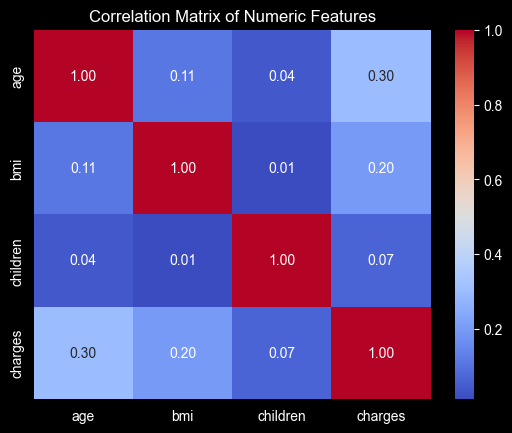

In [10]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### 8. Interesting relationships between features
Based on the correlation matrix, the dependent variable `charges` shows different levels of association with the numeric independent features.

- **Age and charges (correlation ≈ 0.30)**<br>
    This is the strongest relationship among the numeric variables. It indicates a moderate positive correlation, meaning that insurance charges tend to increase as age increases. This is consistent with the expectation that older individuals generally incur higher medical costs.

- **BMI and charges (correlation ≈ 0.20)**<br>
    BMI has a weak to moderate positive correlation with insurance charges. While higher BMI is associated with higher medical expenses, the relatively low correlation suggests that BMI alone does not strongly determine insurance costs and may interact with other variables such as smoking status.

- **Children and charges (correlation ≈ 0.07)**<br>
    The number of children has a very weak correlation with insurance charges, indicating that family size has little direct linear impact on individual insurance costs in this dataset.

Among the independent variables themselves, the correlations are all very low (`age`–`bmi` ≈ 0.11, `age`–`children` ≈ 0.04, `bmi`–`children` ≈ 0.01). This suggests that the numeric predictors are largely independent of one another, with no evidence of multicollinearity.

Overall, the correlation analysis shows that age is the most influential numeric feature related to insurance charges, while BMI plays a secondary role and children contributes minimally. The low correlations among predictors indicate a well-conditioned feature set for regression modeling, and they also suggest that additional explanatory power is likely to come from categorical variables and interaction effects rather than linear numeric relationships alone.

## Visualizing relationships among features

It can also be helpful to visualize the relationships among numeric features by using a scatterplot.

Although we could create a scatterplot for each possible relationship, doing so for a large number of features might become hard.

An alternative is to create a scatterplot matrix, which is simply a collection of scatterplots arranged in a grid.

It is used to detect patterns among three or more variables. The scatterplot matrix is not a true multidimensional visualization because only two features are examined at a time.

Still, it provides a general sense of how the data may be interrelated.

9. Use the scatter_matrix() function to create a scatterplot matrix for the four numeric features: age, bmi, children, and charges.

10. Do you notice any patterns in these plots? Explain.

11. To enhance the previous scatterplot matrix create the new one using the seaborn or plotly libraries. Do you notice any new patterns in these new graphics?

### 9. Scatterplot matrix

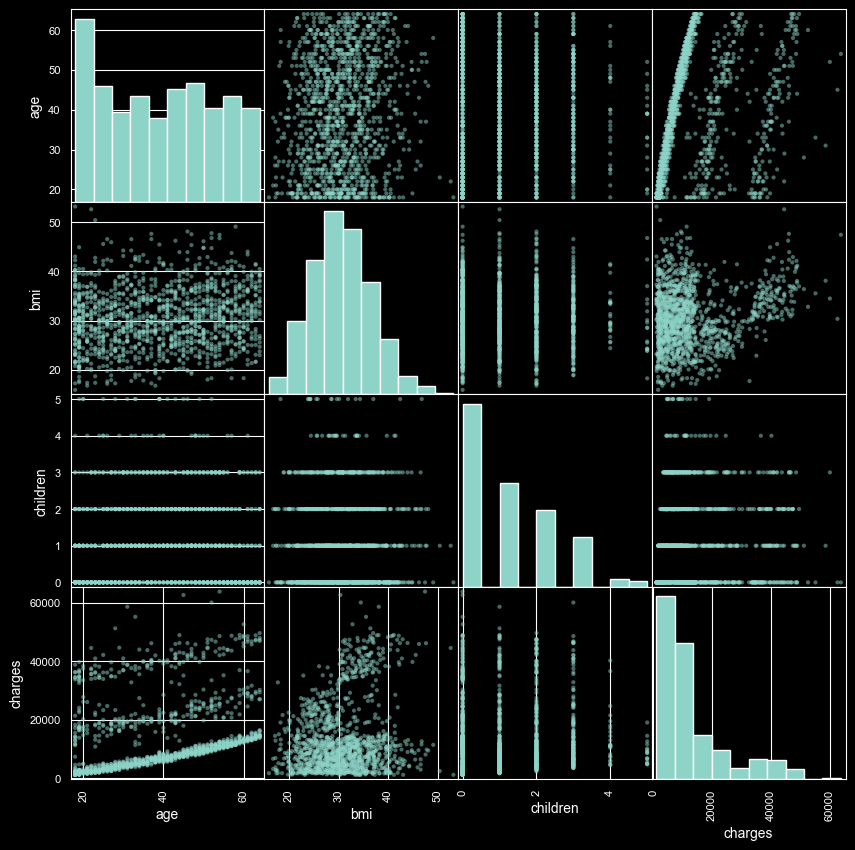

In [12]:
numeric_df = df[['age', 'bmi', 'children', 'charges']]

scatter_matrix(numeric_df, figsize=(10, 10), diagonal='hist')
plt.show()

### 10. Patterns observed in the scatterplot matrix
From the scatterplot matrix created using scatter_matrix(), several clear patterns emerge:
- **Age vs. Charges** <br>
A noticeable upward trend is present. Insurance charges generally increase with age, but the relationship is not tight; there is substantial spread, especially at older ages. This suggests age is an important but not sole driver of insurance costs.
- **BMI vs. Charges** <br>
The relationship appears weak and dispersed. For similar BMI values, charges vary widely, indicating that BMI alone does not strongly explain insurance costs. However, higher charges are more frequently observed at higher BMI levels.
- **Children vs. Charges** <br>
No clear linear relationship is visible. The vertical bands reflect that `children` is a discrete variable, and charges vary substantially within each group, confirming its weak association with the dependent variable.
- **Distributions along the diagonal**
    - `charges` is heavily right-skewed, with most observations clustered at lower values and a long tail of high costs.
    - `children` shows a discrete distribution with a small number of integer values.
    - `age` and `bmi` appear more evenly distributed.

Overall, the scatterplot matrix supports the correlation results: age shows the strongest relationship with charges, while BMI and children show weaker or minimal relationships.

### 11. Enhanced scatterplot matrix

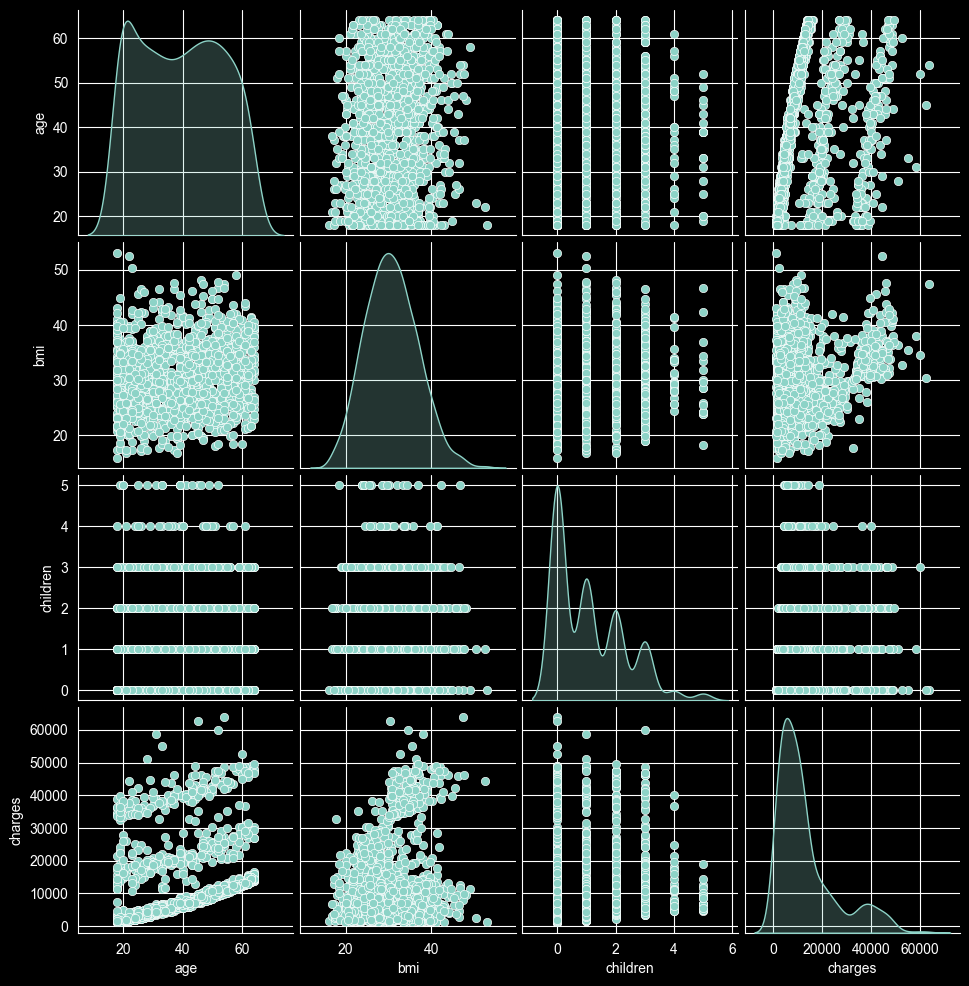

In [13]:
sns.pairplot(numeric_df, diag_kind='kde')
plt.show()

The enhanced scatterplot matrix created using Seaborn reveals additional structure not as easily visible in the basic matrix:
- **Clear clustering in charges** <br>
Two distinct groups of observations appear in the `charges` plots: a large cluster with relatively low charges and a smaller cluster with much higher charges. This suggests the presence of an underlying categorical factor influencing costs.
- **Age and charges relationship becomes more apparent** <br>
The upward trend between age and charges is clearer, with high-charge clusters becoming more prevalent at older ages.
- **BMI and charges interaction** <br>
High charges tend to occur more frequently at higher BMI values, but only for a subset of individuals. This indicates that BMI’s effect on charges is likely conditional on another variable rather than purely linear.
- **Diagonal density plots (KDE)** <br>
The KDE plots emphasize the non-normal distributions, particularly for `charges`, reinforcing the need for transformation or non-linear modeling techniques.
- **Children remains weakly informative** <br>
Even with enhanced visualization, no strong pattern emerges between the number of children and charges.

## Dummy coding

To be able to use all variables in our regression model, we need to transform the categorical variables into numerical.
one way is by transforming every categorical variable into dummy variable.
Dummy coding is a commonly used method for converting a categorical variable into continuous variable.
Dummy, as the name suggests is a duplicate variable which represents one level of a categorical variable.
Presence of a level is represent by 1 and absence is represented by 0.
For every level present, one dummy variable will be created.
Look at the representation below to convert a categorical variable using dummy variable.

**data=pd.get_dummies(df, dtype=int)**

# Training a model on the data

To ﬁt a linear regression model to data with Python, the OLS function can be used. This is included in the statsmodels.api package, which you will need to import as sm. Use the OLS() syntax, to ﬁt a linear regression model to this data( Use all the available features).


## 1. statsmodels.api

Let's use the stats models package.

12. Use the OLS() syntax provided in here: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html, to ﬁt a linear regression model to this data( Use all the available features). Name it “model”.

13. Show the estimated beta coeﬃcients. Explain the results. Why there are 11 coeﬃcients reported in addition to the intercept not 6?

14. What increase, or decrease will aﬀect the medical expenses for each additional child? or additional year of age? or unit increase of BMI?

15. Explain the eﬀect of medical expenses in numbers on each one of the 3 categorical features.

16. To evaluate the model performance, use the summary () function on the stored model.

17. Given the preceding two performance indicators, How the model is performing? explain.

### 12. Fit a linear regression model using OLS

In [3]:
import statsmodels.api as sm

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, dtype=int)

# Separate independent and dependent variables
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Add intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

### 13. Estimated beta coefficients & explanation

In [4]:
model.params

const                -296.416764
age                   256.856353
bmi                   339.193454
children              475.500545
sex_female            -82.551203
sex_male             -213.865562
smoker_no          -12072.475653
smoker_yes          11776.058889
region_northeast      512.905044
region_northwest      159.941144
region_southeast     -522.117005
region_southwest     -447.145947
dtype: float64

The estimated regression coefficients are obtained from `model.params`. Each coefficient represents the expected change in medical charges when the corresponding feature increases by one unit, holding all other variables constant.

Although the original dataset has 6 features, the model reports **11 coefficients in addition to the intercept** because categorical variables were converted into **dummy variables without dropping a reference category**:

- **Sex** → `sex_female`, `sex_male` (2 coefficients)
- **Smoker** → `smoker_no`, `smoker_yes` (2 coefficients)
- **Region** → `region_northeast`, `region_northwest`, `region_southeast`, `region_southwest` (4 coefficients)
- **Numeric variables** → `age`, `bmi`, `children` (3 coefficients)

Each category level is represented explicitly, which increases the total number of coefficients. This encoding choice also explains the multicollinearity warning in the model notes.

### 14. Effect of numeric features on medical expenses
Based on the estimated coefficients:

- **Age** (`coef ≈ 256.86`) <br>
For each additional year of age, medical expenses increase by approximately **$257**, holding all other variables constant.
This effect is **statistically significant** (p < 0.001).

- **BMI** (`coef ≈ 339.19`) <br>
A one-unit increase in BMI increases medical expenses by approximately **$339**.
This indicates a meaningful positive association between body mass index and healthcare costs.

- **Children** (`coef ≈ 475.50`) <br>
Each additional child increases medical expenses by approximately **$476**.
This effect is statistically significant, though smaller than the impact of age and BMI relative to their scales.

### 15. Effect of categorical features on medical expenses
#### Sex
- `sex_female`: −$82.55
- `sex_male`: −$213.87

Both coefficients are **not statistically significant**, indicating that sex does not have a meaningful impact on medical expenses in this model.

#### Smoker
- `smoker_yes`: +$11,776.06
- `smoker_no`: −$12,072.48

Smoking status has an **extremely strong and statistically significant effect** on medical expenses (p < 0.001). <br>
Being a smoker is associated with over **$11,700 higher medical costs**, making it the most influential variable in the model.

#### Region
- `region_northeast`: +$512.91
- `region_northwest`: +$159.94
- `region_southeast`: −$522.12
- `region_southwest`: −$447.15

Regional effects are relatively small compared to smoking, age, and BMI, and **none are statistically significant** at the 5% level. This suggests geographic region has a limited direct effect on medical expenses in this dataset.

### 16. Model performance summary

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:38:45   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -296.4168    430.507     -0.689      0.491   -1140.964     548.130
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female         -82.5512    269.226     -0.307      0.759    -610.706     445.604
sex_male          -213.8656    274.976     -0.778      0.437    -753.299     325.568
smoker_no        -1.207e+04    282.338    -42.759      0.000   -1.26e+04   -1.15e+04
smoker_yes        1.178e+04    313.530     37.560      0.000    1.12e+04    1.24e+04
region_northeast   512.9050    300.348      1.708      0.088     -76.303    1102.113
region_northwest   159.9411    301.334      0.531      0.596    -431.201     751.083
region_southeast  -522.1170    330.759     -1.579      0.115   -1170.983     126.749
region_southwest  -447.1459    310.933     -1.438      0.151   -1057.119     162.827
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     4.23e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 17. Model performance evaluation
#### Strengths
- The model demonstrates strong explanatory power with a high R-squared.
- Key predictors (age, BMI, children, smoking status) are statistically significant and align with domain knowledge.
- The F-statistic confirms that the model is meaningful overall.

#### Limitations
- Residual diagnostics show non-normality (Jarque–Bera p ≈ 0), consistent with the right-skewed distribution of charges.
- The multicollinearity warning arises because all dummy variables were included without a reference category.
- Linear assumptions may not fully capture interactions (e.g., smoker × BMI).

#### Overall assessment
The model performs well as a baseline linear regression, especially for explanatory purposes. However, performance and interpretability could be improved by:

- Dropping reference categories when encoding
- Applying a log transformation to `charges`
- Including interaction terms or nonlinear models

## 2. Scikit learn


Let's use the scikitLearn library.


18. Split the data between training and testing.


19. Use the scikitLearn library to implement the **LinearRegression** function, from sklearn.linear_model, based on the Normal equation to find the value of the weights that minimizes the MSE. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

20. Use the scikitLearn library to implement the **SGDRegressor** function, from sklearn.linear_model, based on the stochastic Gradient descent to find the value of the weights that minimizes the MSE. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#

21. Use SGDRegressor function, from sklearn.linear_model, to implement a similation of the Mini batch Gradient descent.


22. What are the key hyperparameters of each implementation?

23. Find different metrics to evaluate your regression model performance.

### 18. Split the data between training and testing

In [6]:
from sklearn.model_selection import train_test_split

# 1. One-hot encode categorical variables
# drop_first=True to avoid redundant dummy columns
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

# 2. Separate features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 3. Train/test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((1070, 8), (268, 8))

### 19. LinearRegression (Normal Equation)

In [7]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr = lin_reg.predict(X_test)

In [8]:
lin_reg.intercept_

np.float64(-11931.219050326663)

In [9]:
lin_reg.coef_

array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02, -1.85916916e+01,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

### 20. SGDRegressor

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Build a pipeline: scale -> SGDRegressor
sgd_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        max_iter=1000,
        tol=1e-3,
        penalty=None,
        random_state=42
    ))
])

# Fit the model
sgd_reg.fit(X_train, y_train)

# Predictions
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)

In [11]:
sgd_model = sgd_reg.named_steps["sgd"]
sgd_model.intercept_, sgd_model.coef_

(array([13305.47683485]),
 array([ 3.66139686e+03,  2.02840432e+03,  5.32892702e+02, -8.76327961e-01,
         9.55830368e+03, -1.79203821e+02, -2.77956792e+02, -3.62795642e+02]))

### 21. Simulate Mini-batch Gradient Descent with SGDRegressor

In [27]:
from sklearn.utils import shuffle

# Create a fresh SGDRegressor for mini-batch simulation
mb_sgd = SGDRegressor(
    max_iter=1,       # Control epochs manually
    tol=None,
    learning_rate="invscaling",
    eta0=0.01,
    penalty=None,
    random_state=42
)

# IMPORTANT: scale features first for SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_epochs = 100
batch_size = 64

m = X_train_scaled.shape[0]

for epoch in range(n_epochs):
    X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train, random_state=epoch)

    for i in range(0, m, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled.iloc[i:i+batch_size]

        # First call to partial_fit needs the target classes only for classifiers,
        # for regression we can just call it directly
        mb_sgd.partial_fit(X_batch, y_batch)

# Predictions from the mini-batch SGD model
y_train_pred_mb = mb_sgd.predict(X_train_scaled)
y_test_pred_mb = mb_sgd.predict(X_test_scaled)

### 22. Key hyperparameters of each implementation
#### a) `LinearRegression` (Normal Equation)
Key hyperparameters:
- `fit_intercept` (default `True`) <br>
Whether to estimate the intercept term.
- `positive` (default `False`) <br>
If True, forces coefficients to be non-negative.

#### b) `SGDRegressor` (Stochastic GD)
Key hyperparameters:
- `loss` (default `"squared_error"`) <br>
The loss function; for standard linear regression, squared error (MSE) is used.
- `penalty` (default `"l2"` or None) <br>
Regularization type: `"l2"`, `"l1"`, `"elasticnet"`, or `None`.
- `alpha` <br>
Regularization strength.
- `learning_rate` (e.g. `"invscaling"`, `"constant"`, `"optimal"`, `"adaptive"`) <br>
Controls how the learning rate changes over time.
- `eta0` <br>
Initial learning rate when using certain `learning_rate` schedules.
- `max_iter` <br>
Maximum number of iterations over the training data.
- `tol` <br>
Stopping criterion based on the improvement of the objective.
- `early_stopping`, `validation_fraction`, `n_iter_no_change` <br>
Control when and how early stopping is applied.
- `random_state` <br>
Controls randomness in shuffling and initialization.

#### c) Mini-batch Gradient Descent Simulation
In the manual loop, besides the SGDRegressor hyperparameters, we introduced algorithm-level hyperparameters:
- `batch_size` <br>
Number of samples per mini-batch (e.g., 32, 64, 128).
- `n_epochs` <br>
Number of passes over the entire training set.

### 23. Metrics to evaluate regression model performance
Typical regression metrics in scikit-learn:
- **MSE (Mean Squared Error)**

$$\text{MSE} = \frac{1}{n} \sum{(y - \hat{y})^2}$$

- **RMSE (Root Mean Squared Error)** <br>
Same units as the target (`charges`).

$$\text{RMSE}=\sqrt{\text{MSE}}$$

- **MAE (Mean Absolute Error)** <br>
Average absolute error; less sensitive to outliers than MSE.

- **R² score (Coefficient of Determination)** <br>
Proportion of variance in the target explained by the model.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"=== {label} ===")
    print("MSE:   ", mse)
    print("RMSE:  ", rmse)
    print("MAE:   ", mae)
    print("R^2:   ", r2)
    print()

evaluate_regression(y_test, y_test_pred_lr,  label="LinearRegression (Normal Equation)")
evaluate_regression(y_test, y_test_pred_sgd, label="SGDRegressor (SGD)")
evaluate_regression(y_test, y_test_pred_mb,  label="Mini-batch SGD")

=== LinearRegression (Normal Equation) ===
MSE:    33596915.85136146
RMSE:   5796.2846592762735
MAE:    4181.1944737536505
R^2:    0.7835929767120723

=== SGDRegressor (SGD) ===
MSE:    33608142.311612695
RMSE:   5797.252997033396
MAE:    4172.320831251897
R^2:    0.7835206639778982

=== Mini-batch SGD ===
MSE:    33579606.134659655
RMSE:   5794.791293451357
MAE:    4175.039244315702
R^2:    0.7837044733828372



All three regression approaches perform similarly with an R² of approximately 0.78, with LinearRegression slightly outperforming SGD-based methods, indicating that the linear model captures most of the explainable variance in medical expenses.